In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#read csv file
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [4]:
#new dataframe shows number_of_reviews and price
airbnb_review_price = airbnb[['host_id', 'number_of_reviews', 'price']]

In [5]:
airbnb_review_price.head()

,host_id,number_of_reviews,price
0,2787,9,149
1,2845,45,225
2,4632,0,150
3,4869,270,89
4,7192,9,80


In [6]:
#find the most reviews 
airbnb_review_price['number_of_reviews'].max()

629

In [7]:
# find the house that has the most number of reviews. 
airbnb.set_index('number_of_reviews', inplace=True)
airbnb.loc[629]

id                                                9145202
name                              Room near JFK Queen Bed
host_id                                          47621202
host_name                                            Dona
neighbourhood_group                                Queens
neighbourhood                                     Jamaica
latitude                                          40.6673
longitude                                        -73.7683
room_type                                    Private room
price                                                  47
minimum_nights                                          1
last_review                                      7/5/2019
reviews_per_month                                   14.58
calculated_host_listings_count                          2
availability_365                                      333
Name: 629, dtype: object

In [8]:
#find the highest price
airbnb_review_price['price'].max()

10000

In [9]:
#find the most expensive house(3 houses found)
airbnb.set_index('price', inplace=True)
airbnb.loc[10000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
price,,,,,,,,,,,,,,
10000,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,100,2/13/2016,0.04,1,0
10000,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,5,7/27/2017,0.16,1,0
10000,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,30,NaN,NaN,1,83


In [10]:
price = airbnb_review_price['price']

In [11]:
num_reviews = airbnb_review_price['number_of_reviews']


(1, 660.4651766004415)

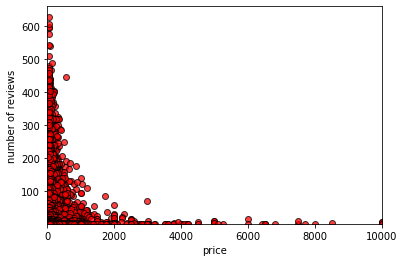

In [12]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
fig = plt.scatter(price, num_reviews, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('price')
plt.ylabel('number of reviews')
plt.xlim(0,10000)
plt.ylim(1,)


(1, 660.4651766004415)

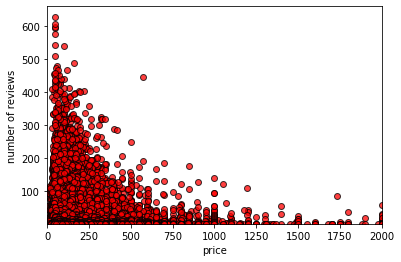

In [13]:
# let's see what the graph looks like if we take out some highest prices.only the house with the pirce between 0-2000
# The size of each point on our plot is determined by their x value
fig = plt.scatter(price, num_reviews, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('price')
plt.ylabel('number of reviews')
plt.xlim(0,2000)
plt.ylim(1,)


In [14]:
# make a new chart that only shows number_of_reviews and price
review_price=airbnb_review_price[['number_of_reviews', 'price']]
review_price.head()

,number_of_reviews,price
0,9,149
1,45,225
2,0,150
3,270,89
4,9,80


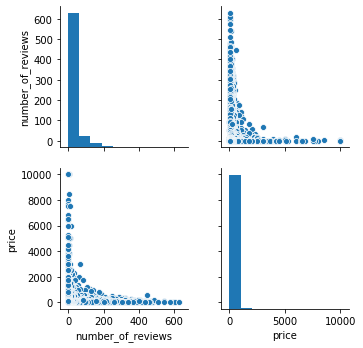

In [15]:
# use seaborn to plot graphs
sns.pairplot(review_price)

In [16]:
# see the correlation between number_of_reviews and price
review_price.corr()

,number_of_reviews,price
number_of_reviews,1.000000,-0.047954
price,-0.047954,1.000000


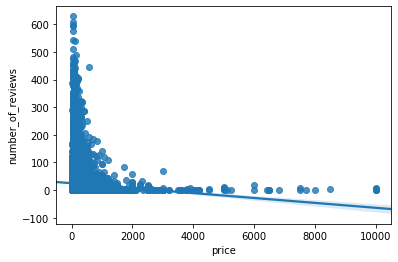

In [17]:
#use seaborn to plot the scattor plat with the liner regression line(best fit line).
sns.regplot(x='price', y='number_of_reviews', data=review_price)

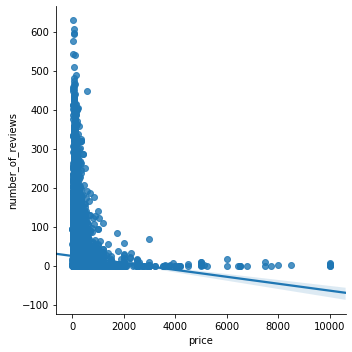

In [18]:

sns.lmplot(x='price', y='number_of_reviews', data=review_price)

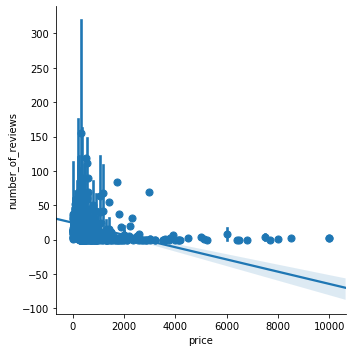

,availability_365
minimum_nights,price


,minimum_nights,availability_365
price,,
149,1,365
225,1,355
150,3,365
89,1,194
80,10,0
200,3,129
60,45,0
79,2,220
79,2,0


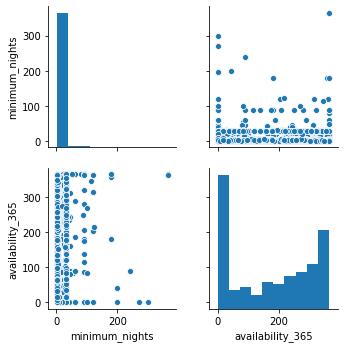

In [33]:
sns.pairplot(new_df)